In [44]:
import joblib
from pathlib import Path
from tqdm import tqdm
import sys
sys.path.append('../')
from core.utils import *

In [5]:
nominal_path = '/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/NewWorkflow/trained_lightGBM_new/nominal'
nominal_path = Path(nominal_path)

In [19]:
pythiaA = joblib.load(nominal_path / 'pythiaA_pred.pkl')

In [20]:
pythiaA.head()

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,event_weight,...,is_leading,pt_idx,target,GBDT_newScore,jet_nTracks_quark_reweighting_weights,jet_nTracks_gluon_reweighting_weights,jet_trackBDT_quark_reweighting_weights,jet_trackBDT_gluon_reweighting_weights,GBDT_newScore_quark_reweighting_weights,GBDT_newScore_gluon_reweighting_weights
0,364703.0,46193254.0,766.747925,1.298662,2.0,0.318292,0.215923,-0.192873,21.0,17.609434,...,1.0,1,1,-1.426786,17.609434,17.609434,17.609434,17.609434,17.609434,17.609434
1,364703.0,46193254.0,701.621765,-0.989431,2.0,0.269898,0.157799,-0.126821,-1.0,17.609434,...,0.0,1,-,-2.029368,13.349345,9.555401,18.727486,18.075182,16.430940,15.729694
0,364704.0,46029800.0,567.369995,1.253171,34.0,0.157933,0.323757,0.253368,21.0,0.305107,...,1.0,0,1,1.562195,0.305107,0.305107,0.305107,0.305107,0.305107,0.305107
1,364704.0,46029800.0,517.005432,-0.372214,40.0,0.130906,0.308239,0.353442,21.0,0.305107,...,0.0,0,1,2.224734,0.378179,0.348352,0.348035,0.314166,0.416216,0.346941
2,364704.0,46032096.0,690.617371,-0.081755,14.0,0.023161,0.134914,-0.209946,3.0,0.449083,...,1.0,1,0,-1.793333,0.448903,0.401143,0.446572,0.433194,0.432625,0.402576


In [23]:
reweight_factor_flateta = dict.fromkeys(label_pt_bin[:-1])

In [82]:
eta_bins = np.linspace(-2.1, 2.1, 501)
eta_hist_ptbins = dict.fromkeys(label_pt_bin[:-1])
for pt_idx, pt in tqdm(enumerate(label_pt_bin[:-1])):
    eta_hist =Hist(hist.axis.Regular(bins=len(eta_bins)-1, start=eta_bins[0], stop=eta_bins[-1], overflow=True, underflow=True), 
                                    storage=hist.storage.Weight())

    for period in ['A', 'D', 'E']:
        if period=='E':
            for i in ['1','2']:
                pythia_period = joblib.load(nominal_path / f'pythia{period}_part{i}_pred.pkl') # period E is split into two parts 
                pythia_period_pt = pythia_period[pythia_period['pt_idx']==pt_idx]
                eta_hist.fill(pythia_period_pt['jet_eta'], weight=pythia_period_pt['event_weight'])

        else:
            pythia_period = joblib.load(nominal_path / f'pythia{period}_pred.pkl')
            pythia_period_pt = pythia_period[pythia_period['pt_idx']==pt_idx]
            eta_hist.fill(pythia_period_pt['jet_eta'], weight=pythia_period_pt['event_weight'])

    eta_hist_ptbins[pt] = eta_hist 

6it [03:55, 39.28s/it]


In [81]:
joblib.dump(eta_hist_ptbins, "eta_hist_ptbins.pkl")

['eta_hist_ptbins.pkl']

In [83]:
1./ eta_hist_ptbins[500].values()

array([4.22250578e-05, 4.02288805e-05, 3.81543447e-05, 3.63875487e-05,
       3.45670837e-05, 3.34716191e-05, 3.36681151e-05, 3.38823180e-05,
       3.51488046e-05, 3.52056210e-05, 3.54739141e-05, 3.57199372e-05,
       3.33137660e-05, 3.19165636e-05, 2.97506797e-05, 2.79966747e-05,
       2.67449304e-05, 2.63875736e-05, 2.66367697e-05, 2.73422849e-05,
       2.83690153e-05, 2.89403128e-05, 2.88458745e-05, 3.04157631e-05,
       2.74663122e-05, 2.62180143e-05, 2.47455121e-05, 2.30540535e-05,
       2.25111714e-05, 2.21489352e-05, 2.21721290e-05, 2.34622677e-05,
       2.39985489e-05, 2.43756205e-05, 2.44691675e-05, 2.42839818e-05,
       2.33601075e-05, 2.20119239e-05, 2.09515867e-05, 1.99038442e-05,
       1.94536576e-05, 1.95454162e-05, 2.00712951e-05, 2.11520506e-05,
       2.20591394e-05, 2.26649352e-05, 2.30144307e-05, 1.52819978e-05,
       2.20538651e-05, 2.13347316e-05, 1.99167066e-05, 1.89462703e-05,
       1.83470906e-05, 1.78886148e-05, 1.78475624e-05, 1.82267767e-05,
      

In [84]:
pythia_period_pt = pythia_period[pythia_period['pt_idx']==0]

In [85]:
pythia_period_pt

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,event_weight,...,is_leading,pt_idx,target,GBDT_newScore,jet_nTracks_quark_reweighting_weights,jet_nTracks_gluon_reweighting_weights,jet_trackBDT_quark_reweighting_weights,jet_trackBDT_gluon_reweighting_weights,GBDT_newScore_quark_reweighting_weights,GBDT_newScore_gluon_reweighting_weights
205,364705.0,9213956.0,562.511780,-0.550168,30.0,0.078789,0.293317,0.336510,21.0,6.467293e-01,...,0.0,0,1,1.860423,7.912814e-01,6.908633e-01,7.487183e-01,6.780462e-01,8.208564e-01,6.976930e-01
235,364705.0,9213592.0,593.081970,1.054687,27.0,0.035483,0.212188,0.278056,21.0,2.393493e-01,...,0.0,0,1,1.577655,2.393493e-01,2.393493e-01,2.393493e-01,2.393493e-01,2.393493e-01,2.393493e-01
283,364705.0,9213808.0,568.854492,1.854574,18.0,0.032248,0.225364,-0.017358,3.0,1.622527e-01,...,0.0,0,0,0.502986,1.622527e-01,1.622527e-01,1.622527e-01,1.622527e-01,1.622527e-01,1.622527e-01
297,364705.0,9215152.0,504.643646,-0.099904,19.0,0.114386,0.292917,0.038832,21.0,7.242358e-01,...,0.0,0,1,0.268440,8.041289e-01,6.949721e-01,7.499033e-01,7.172888e-01,7.695593e-01,6.880352e-01
329,364705.0,9227550.0,594.257935,-0.463971,32.0,0.186246,0.323806,0.190829,21.0,2.547273e-01,...,0.0,0,1,1.108664,2.547273e-01,2.547273e-01,2.547273e-01,2.547273e-01,2.547273e-01,2.547273e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,364708.0,6817027.0,543.499573,-0.838647,25.0,0.200883,0.246614,0.060865,1.0,8.292582e-05,...,0.0,0,0,-0.228568,9.811832e-05,8.509675e-05,8.617755e-05,8.238161e-05,8.346384e-05,7.722686e-05
171,364709.0,240460.0,538.776489,0.270593,19.0,0.026546,0.201542,0.149485,21.0,4.046722e-06,...,0.0,0,1,0.724709,4.046722e-06,4.046722e-06,4.046722e-06,4.046722e-06,4.046722e-06,4.046722e-06
219,364709.0,2716990.0,578.046326,0.406622,24.0,0.033301,0.233715,0.272786,21.0,1.044487e-05,...,0.0,0,1,1.516590,1.044487e-05,1.044487e-05,1.044487e-05,1.044487e-05,1.044487e-05,1.044487e-05
105,364709.0,2725252.0,521.761292,-0.687140,15.0,0.100617,0.263055,-0.021191,2.0,0.000000e+00,...,0.0,0,0,-0.192821,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [86]:
eta_idx  = np.digitize(pythia_period_pt['jet_eta'], bins=eta_bins) - 1

In [87]:
pythia_period_pt['jet_eta']

205   -0.550168
235    1.054687
283    1.854574
297   -0.099904
329   -0.463971
         ...   
237   -0.838647
171    0.270593
219    0.406622
105   -0.687140
153   -1.362553
Name: jet_eta, Length: 169431, dtype: float64

In [88]:
eta_idx

array([184, 375, 470, ..., 298, 168,  87])

In [91]:
eta_hist =Hist(hist.axis.Regular(bins=100, start=-2.1, stop=2.1, overflow=True, underflow=True), 
                                    storage=hist.storage.Weight())
eta_hist.fill(pythia_period_pt['jet_eta'], weight=pythia_period_pt['event_weight']* 1./ eta_hist_ptbins[500].values()[eta_idx])

Hist(Regular(50, -2.1, 2.1, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=0.663473, variance=5.31876e-06)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x14c5cf60a550>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

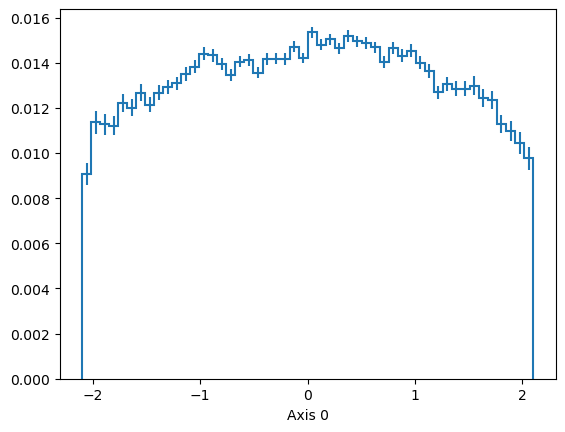

In [92]:
eta_hist.plot()

In [62]:
eta_idx

array([36, 75, 94, ..., 59, 33, 17])

In [102]:
eta_reweight_factor = dict.fromkeys(label_pt_bin, [1.0/eta_hist_ptbin.values() for eta_hist_ptbin in eta_hist_ptbins.values()])

/tmp/ipykernel_201990/1720098934.py:1: RuntimeWarning: divide by zero encountered in divide
  eta_reweight_factor = dict.fromkeys(label_pt_bin, [1.0/eta_hist_ptbin.values() for eta_hist_ptbin in eta_hist_ptbins.values()])


In [104]:
for k,v in eta_hist_ptbins.items():
    
    eta_reweight_factor[k] = 

[array([4.22250578e-05, 4.02288805e-05, 3.81543447e-05, 3.63875487e-05,
        3.45670837e-05, 3.34716191e-05, 3.36681151e-05, 3.38823180e-05,
        3.51488046e-05, 3.52056210e-05, 3.54739141e-05, 3.57199372e-05,
        3.33137660e-05, 3.19165636e-05, 2.97506797e-05, 2.79966747e-05,
        2.67449304e-05, 2.63875736e-05, 2.66367697e-05, 2.73422849e-05,
        2.83690153e-05, 2.89403128e-05, 2.88458745e-05, 3.04157631e-05,
        2.74663122e-05, 2.62180143e-05, 2.47455121e-05, 2.30540535e-05,
        2.25111714e-05, 2.21489352e-05, 2.21721290e-05, 2.34622677e-05,
        2.39985489e-05, 2.43756205e-05, 2.44691675e-05, 2.42839818e-05,
        2.33601075e-05, 2.20119239e-05, 2.09515867e-05, 1.99038442e-05,
        1.94536576e-05, 1.95454162e-05, 2.00712951e-05, 2.11520506e-05,
        2.20591394e-05, 2.26649352e-05, 2.30144307e-05, 1.52819978e-05,
        2.20538651e-05, 2.13347316e-05, 1.99167066e-05, 1.89462703e-05,
        1.83470906e-05, 1.78886148e-05, 1.78475624e-05, 1.822677

In [107]:
eta_hist_ptbins[1500]

Hist(Regular(500, -2.1, 2.1, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=129270, variance=16151.4)

In [108]:
np.nan_to_num(eta_reweight_factor[1500])

array([[4.22250578e-005, 4.02288805e-005, 3.81543447e-005, ...,
        3.84091626e-005, 3.97048909e-005, 4.16982914e-005],
       [7.80489335e-005, 7.50458783e-005, 6.82790999e-005, ...,
        6.74358985e-005, 7.31140750e-005, 7.65034350e-005],
       [1.00877064e-003, 9.21623845e-004, 8.29112928e-004, ...,
        8.28874986e-004, 9.09754388e-004, 9.59802612e-004],
       [1.69232981e-002, 1.46235688e-002, 1.36574932e-002, ...,
        1.33322205e-002, 1.43846677e-002, 1.63062850e-002],
       [6.78647216e-001, 6.20920972e-001, 4.21318613e-001, ...,
        2.91760963e-001, 4.38050432e-001, 6.49456112e-001],
       [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
        1.79769313e+308, 1.79769313e+308, 1.79769313e+308]])

In [115]:
eta_hist_ptbins[1500].values()

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.29599741e-02,
       1.55486479e-02, 2.17057411e-02, 0.00000000e+00, 0.00000000e+00,
       1.98980391e-02, 0.00000000e+00, 2.15889463e-02, 3.63268704e-02,
       9.55056485e-02, 6.28212275e-02, 9.65042368e-02, 1.00577743e-01,
       2.15769355e-01, 1.10463534e-01, 1.38204677e-01, 1.51533360e-01,
       2.87699964e-01, 4.33374827e-01, 4.92346965e-01, 5.65724416e-01,
       7.44937774e-01, 7.53818295e-01, 1.03149506e+00, 9.93269593e-01,
       1.00465706e+00, 1.29986551e+00, 1.31710787e+00, 1.61642286e+00,
       2.44611731e+00, 2.87548593e+00, 3.55188887e+00, 3.36420525e+00,
       3.76154463e+00, 4.17956156e+00, 4.45428130e+00, 4.23660139e+00,
       3.60839854e+00, 3.87830594e+00, 3.93727694e+00, 6.04970874e+00,
       3.99757840e+00, 4.78942172e+00, 5.97656269e+00, 6.70598423e+00,
       8.29280404e+00, 9.63895832e+00, 1.23035149e+01, 1.37103618e+01,
      